In [1]:
import sklearn
print(sklearn.__version__)

1.0


# Project_1  load_digits :
<p style = "font-size:20px">손글씨를 분류해 봅시다<p/>

## (1) 필요한 모듈 import하기

In [2]:
# 싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.datasets import load_digits 

# 싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.model_selection import train_test_split

# 싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드
from sklearn.metrics import classification_report 

## (2) 데이터 준비 
load_digits 메서드를 사용합니다.


In [3]:
# digits 데이터 전체를 불러온다.
digit = load_digits() 
# digits데이터의 data컬럼을 분류해 digits_data 변수에 담는다.
digit_data = digit.data 

## (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    (3.1) Feature Data 지정하기
    (3.2) Label Data 지정하기
    (3.3) Target Names 출력해 보기
    (3.4) 데이터 Describe 해 보기

In [6]:
# (3.1) Feature Data 지정하기
import pandas as pd
digit_df = pd.DataFrame(data=digit_data, columns=digit.feature_names)

digit_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [7]:
# (3.2) Label Data 지정하기
#digits데이터의 target컬럼을 분류해 digit_label 변수에 담는다.

digit_label = digit.target 

In [8]:
#(3.3) Target Names 출력해 보기

digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# (3.4) 데이터 Describe 해 보기

print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## (4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [11]:
# train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
# test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(digit_data, 
                                                    digit_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

## (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다.   
어떤 모델이 가장 좋은 성능을 보일까요?

    (5.1) Decision Tree 사용해 보기
    (5.2) Random Forest 사용해 보기
    (5.3) SVM 사용해 보기
    (5.4) SGD Classifier 사용해 보기
    (5.5) Logistic Regression 사용해 보기

In [12]:
# (5.1) Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.

print(decision_tree._estimator_type) # 이 모델의 타입을 확인

decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [13]:
# (5.2) Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) 

print(random_forest._estimator_type) # 이 모델의 타입을 확인

random_forest.fit(X_train, y_train) 
y_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [14]:
# (5.3) SVM 사용해 보기
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델의 타입을 확인

svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [15]:
# (5.4) SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import

sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.81      0.83        42
           2       0.95      0.97      0.96        40
           3       0.91      0.94      0.93        34
           4       1.00      0.97      0.99        37
           5       0.97      1.00      0.98        28
           6       0.96      0.93      0.95        28
           7       1.00      0.97      0.98        33
           8       0.83      0.91      0.87        43
           9       0.93      0.88      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [16]:
# (5.5) Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

logistic_model.fit(X_train,y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.81      0.83        42
           2       0.95      0.97      0.96        40
           3       0.91      0.94      0.93        34
           4       1.00      0.97      0.99        37
           5       0.97      1.00      0.98        28
           6       0.96      0.93      0.95        28
           7       1.00      0.97      0.98        33
           8       0.83      0.91      0.87        43
           9       0.93      0.88      0.90        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## (6) 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

숫자가 틀리고 맞음은 암 데이터에 비해 recall, precision 중 우선순위가 높은 게 없다고 생각을 하였다. 그래서, 이들을 조화평균 하여 score를 내주는 f1 score를 사용하였다

<hr>
<hr>  

# Project_2 load_wine :  
<p style = "font-size:20px">와인을 분류해 봅시다</p>

## (1) 필요한 모듈 import하기

In [17]:
# 싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.datasets import load_wine

# 싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.model_selection import train_test_split

# 싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드
from sklearn.metrics import classification_report 

## (2) 데이터 준비 
load_digits 메서드를 사용합니다.


In [19]:
# digits 데이터 전체를 불러온다.
wine = load_wine() 

# digits데이터의 data컬럼을 분류해 digits_data 변수에 담는다.
wine_data = wine.data 

## (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    (3.1) Feature Data 지정하기
    (3.2) Label Data 지정하기
    (3.3) Target Names 출력해 보기
    (3.4) 데이터 Describe 해 보기

In [20]:
# (3.1) Feature Data 지정하기
import pandas as pd
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)

wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [21]:
# (3.2) Label Data 지정하기
#digits데이터의 target컬럼을 분류해 digit_label 변수에 담는다.

wine_label = wine.target 

In [22]:
#(3.3) Target Names 출력해 보기

wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
# (3.4) 데이터 Describe 해 보기

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## (4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [24]:
# train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
# test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

## (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다.   
어떤 모델이 가장 좋은 성능을 보일까요?

    (5.1) Decision Tree 사용해 보기
    (5.2) Random Forest 사용해 보기
    (5.3) SVM 사용해 보기
    (5.4) SGD Classifier 사용해 보기
    (5.5) Logistic Regression 사용해 보기

In [25]:
# (5.1) Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.

print(decision_tree._estimator_type) # 이 모델의 타입을 확인

decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [26]:
# (5.2) Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) 

print(random_forest._estimator_type) # 이 모델의 타입을 확인

random_forest.fit(X_train, y_train) 
y_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
# (5.3) SVM 사용해 보기
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델의 타입을 확인

svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [28]:
# (5.4) SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import

sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.90      0.53      0.67        17
           2       0.52      0.92      0.67        12

    accuracy                           0.69        36
   macro avg       0.81      0.72      0.72        36
weighted avg       0.79      0.69      0.70        36



In [29]:
# (5.5) Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

logistic_model.fit(X_train,y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.90      0.53      0.67        17
           2       0.52      0.92      0.67        12

    accuracy                           0.69        36
   macro avg       0.81      0.72      0.72        36
weighted avg       0.79      0.69      0.70        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## (6) 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

recall, precision 중 우선순위가 높은 게 없다고 생각을 하였다. 그래서, 앞서 한 손글씨 인식과 동일하게 이들을 조화평균 하여 score를 내주는 f1 score를 사용하였다.

<hr>
<hr>  

# Project_3 load_breast_cancer :
<p style = "font-size:20px">유방암 여부를 진단해 봅시다</p>

## (1) 필요한 모듈 import하기

In [30]:
# 싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.datasets import load_breast_cancer

# 싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.model_selection import train_test_split

# 싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드
from sklearn.metrics import classification_report 

## (2) 데이터 준비 
load_digits 메서드를 사용합니다.


In [31]:
# digits 데이터 전체를 불러온다.
cancer = load_breast_cancer() 

# digits데이터의 data컬럼을 분류해 digits_data 변수에 담는다.
cancer_data = cancer.data 

## (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    (3.1) Feature Data 지정하기
    (3.2) Label Data 지정하기
    (3.3) Target Names 출력해 보기
    (3.4) 데이터 Describe 해 보기

In [32]:
# (3.1) Feature Data 지정하기
import pandas as pd
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)

cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
# (3.2) Label Data 지정하기
#digits데이터의 target컬럼을 분류해 digit_label 변수에 담는다.

cancer_label = cancer.target 

In [34]:
#(3.3) Target Names 출력해 보기

cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [35]:
# (3.4) 데이터 Describe 해 보기

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## (4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.  
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [36]:
# train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
# test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

## (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다.   
어떤 모델이 가장 좋은 성능을 보일까요?

    (5.1) Decision Tree 사용해 보기
    (5.2) Random Forest 사용해 보기
    (5.3) SVM 사용해 보기
    (5.4) SGD Classifier 사용해 보기
    (5.5) Logistic Regression 사용해 보기

In [37]:
# (5.1) Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.

print(decision_tree._estimator_type) # 이 모델의 타입을 확인

decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [38]:
# (5.2) Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) 

print(random_forest._estimator_type) # 이 모델의 타입을 확인

random_forest.fit(X_train, y_train) 
y_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [39]:
# (5.3) SVM 사용해 보기
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델의 타입을 확인

svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [40]:
# (5.4) SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import

sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [41]:
# (5.5) Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

logistic_model.fit(X_train,y_train)
pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## (6) 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

 암 데이터의 경우, 환자를 양성으로 오진하는 것은 큰 문제가 되지 않지만, 음성으로 오진하여 실제 양성환자를 놓치는 경우 큰 문제가 발생하게 된다. 따라서 Recall로 score를 내야 한다고 생각했다

# 회고

## **Reference.**  

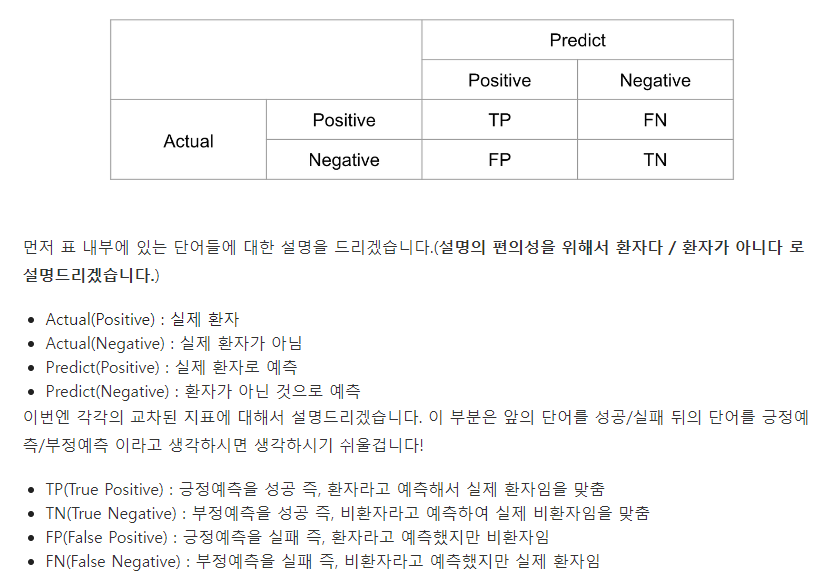

---
---
**Ref.Site**
- [Confusion matrix 개념 정리](https://nittaku.tistory.com/295)
- [Confusion matrix 해석 설명 영상](https://www.youtube.com/watch?v=M0GBAzFV9_A)